In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR/tesseract.exe'

import cv2
from matplotlib import pyplot as plt
import numpy as np
import re
from vision_detector import VisionDetector

In [2]:
img_path1 = r'C:\Users\jedrz\OneDrive\Documents\metin2_vision_bot\data\tmp\user_pos_text.png'
text = pytesseract.image_to_string(img_path1)
print(f"{text=}")

text=''


## Minimap, user position

In [3]:
def get_first_pixel(img):
    return img[0, 0]

def scale_img(img, scale=5):
    width = int(img.shape[1] * scale)
    height = int(img.shape[0] * scale)
    return cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA)

def binarized_to_grayscale(binarized_img):
    # return np.array([[[x, x, x] for x in row] for row in binarized_img], dtype=np.uint8) * 255

    # Ensure the input is a NumPy array for efficient computation
    binarized_img = np.array(binarized_img, dtype=np.uint8)
    # Use broadcasting to replicate the binarized image across the RGB channels
    grayscale_img = np.expand_dims(binarized_img, axis=-1) * 255
    # Stack the single channel image across the three channels (RGB)
    return np.repeat(grayscale_img, 3, axis=-1)

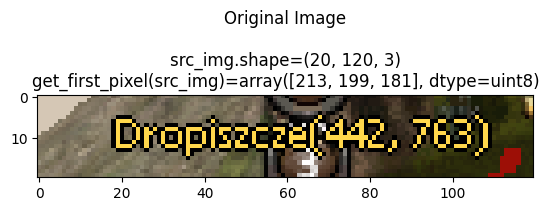

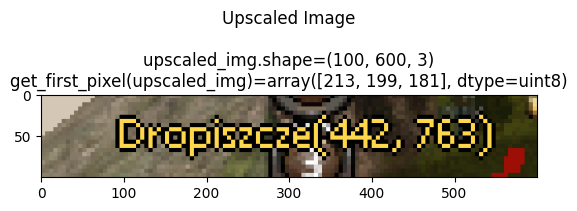

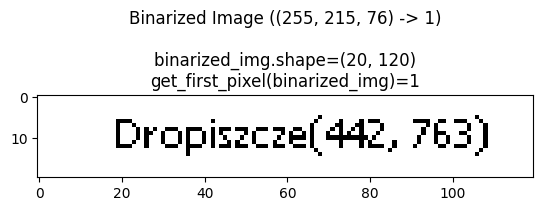

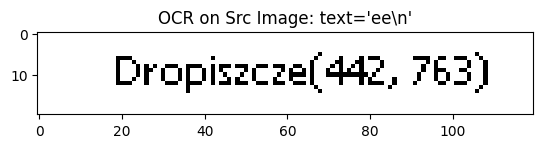

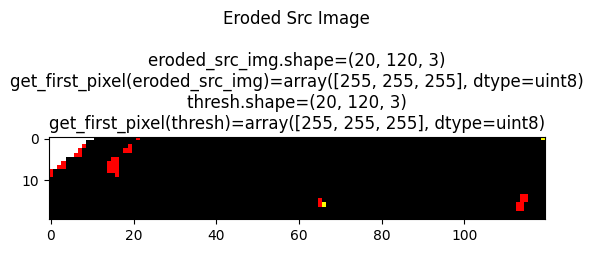

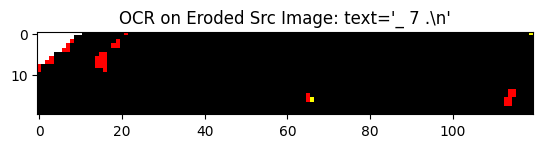

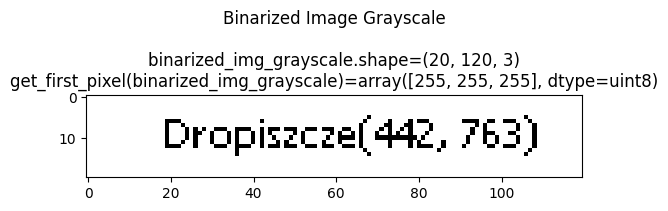

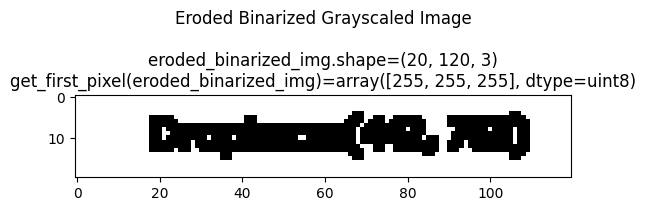

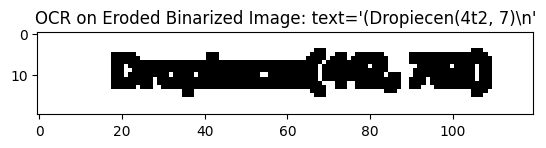

In [4]:
rgb_text_main_color = (255, 215, 76)


src_img = cv2.imread(img_path1, cv2.IMREAD_COLOR)
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

plt.title(f"Original Image\n\n{src_img.shape=}\n{get_first_pixel(src_img)=}")
plt.imshow(src_img)
plt.show()


upscaled_img = scale_img(src_img, scale=5)
plt.title(f"Upscaled Image\n\n{upscaled_img.shape=}\n{get_first_pixel(upscaled_img)=}")
plt.imshow(upscaled_img)
plt.show()


binarized_img = np.where(np.all(src_img == rgb_text_main_color, axis=-1), 0, 1)

plt.title(f"Binarized Image ({rgb_text_main_color} -> 1)\n\n{binarized_img.shape=}\n{get_first_pixel(binarized_img)=}")
plt.imshow(binarized_img, cmap='gray')
plt.show()


oem = 1
psm = 7  # implies that we are treating the ROI as a single line of text

text = pytesseract.image_to_string(binarized_img, config=f'--psm {psm} --oem {oem}')
plt.title(f"OCR on Src Image: {text=}")
plt.imshow(binarized_img, cmap='gray')
plt.show()


ret, thresh = cv2.threshold(src_img, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
eroded_src_img = cv2.erode(thresh, kernel, iterations = 1)
plt.title(f"Eroded Src Image\n\n{eroded_src_img.shape=}\n{get_first_pixel(eroded_src_img)=}\n{thresh.shape=}\n{get_first_pixel(thresh)=}")
plt.imshow(eroded_src_img, cmap='gray')
plt.show()


text = pytesseract.image_to_string(eroded_src_img, config=f'--psm {psm} --oem {oem}')
plt.title(f"OCR on Eroded Src Image: {text=}")
plt.imshow(eroded_src_img, cmap='gray')
plt.show()


kernel = np.ones((3,3), np.uint8)
binarized_img_grayscale = binarized_to_grayscale(binarized_img)
plt.title(f"Binarized Image Grayscale\n\n{binarized_img_grayscale.shape=}\n{get_first_pixel(binarized_img_grayscale)=}")
plt.imshow(binarized_img_grayscale)
plt.show()

eroded_binarized_img = cv2.erode(binarized_img_grayscale, kernel, iterations = 1)
plt.title(f"Eroded Binarized Grayscaled Image\n\n{eroded_binarized_img.shape=}\n{get_first_pixel(eroded_binarized_img)=}")
plt.imshow(eroded_binarized_img, cmap='gray')
plt.show()


text = pytesseract.image_to_string(eroded_binarized_img, config=f'--psm {psm} --oem {oem}')
plt.title(f"OCR on Eroded Binarized Image: {text=}")
plt.imshow(eroded_binarized_img, cmap='gray')
plt.show()

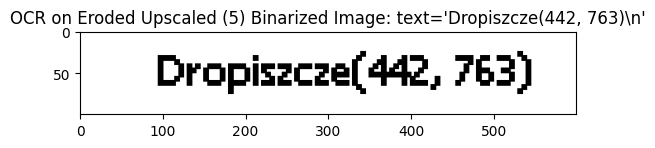

In [5]:
upscale = 5

upscaled_img = scale_img(src_img, scale=upscale)
upscaled_binarized_img = np.where(np.all(upscaled_img == rgb_text_main_color, axis=-1), 0, 1)
upscaled_binarized_img_grayscale = binarized_to_grayscale(upscaled_binarized_img)
eroded_upscaled_binarized_img = cv2.erode(upscaled_binarized_img_grayscale, kernel, iterations = 1)

text = pytesseract.image_to_string(eroded_upscaled_binarized_img, config=f'--psm {psm} --oem {oem}')
plt.title(f"OCR on Eroded Upscaled ({upscale}) Binarized Image: {text=}")
plt.imshow(eroded_upscaled_binarized_img, cmap='gray')
plt.show()

In [6]:
def get_user_pos_from_minimap_text(text):
    pattern = re.compile(r"(\d+),\s*(\d+)")
    match = pattern.search(text)
    if match is None:
        print(f"Failed to match {text=}")
    return tuple(map(int, match.groups()))

x, y = get_user_pos_from_minimap_text(text)
print(f"{x=}, {y=}")

x=442, y=763


## Dungeon Message

In [7]:
potwory_200_msg_fpath = r"C:\Users\jedrz\OneDrive\Documents\metin2_vision_bot\data\datasets\dungeon_messages\0220_214447.jpg"
przeniesienie_dalej_msg_fpath = r"C:\Users\jedrz\OneDrive\Documents\metin2_vision_bot\data\datasets\dungeon_messages\0220_214447.jpg"

In [8]:
src_img = cv2.imread(przeniesienie_dalej_msg_fpath, cv2.IMREAD_COLOR)
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

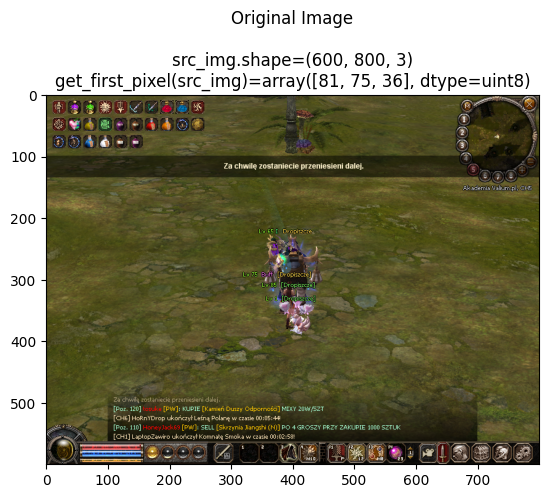

In [9]:
plt.title(f"Original Image\n\n{src_img.shape=}\n{get_first_pixel(src_img)=}")
plt.imshow(src_img)
plt.show()

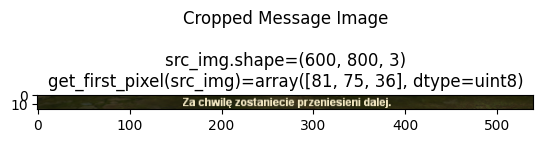

In [10]:
# msg_bbox = (280, 108, 250, 16)
msg_bbox = (130, 108, 540, 16)
cropped_msg_img = VisionDetector.crop_bbox(src_img, *msg_bbox)
plt.title(f"Cropped Message Image\n\n{src_img.shape=}\n{get_first_pixel(src_img)=}")
plt.imshow(cropped_msg_img)
plt.show()

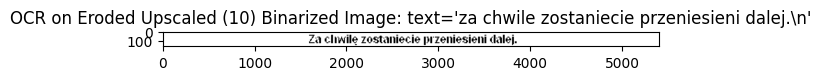

In [11]:
min_grayscale_threshold = 200
upscale = 10
oem = 1
psm = 7  # implies that we are treating the ROI as a single line of text
ocr_config = f'-l pol --psm {psm} --oem {oem}'

cropped_msg_img_grayscale = cv2.cvtColor(cropped_msg_img, cv2.COLOR_BGR2GRAY)
upscaled_img = scale_img(cropped_msg_img_grayscale, scale=upscale)

_, upscaled_binarized_img = cv2.threshold(upscaled_img, min_grayscale_threshold, 255, cv2.THRESH_BINARY)
upscaled_binarized_img = cv2.bitwise_not(upscaled_binarized_img)  # swap 0 - 255 to match the text color

text = pytesseract.image_to_string(upscaled_binarized_img, config=ocr_config)
plt.title(f"OCR on Eroded Upscaled ({upscale}) Binarized Image: {text=}")
plt.imshow(upscaled_binarized_img, cmap='gray')
plt.show()

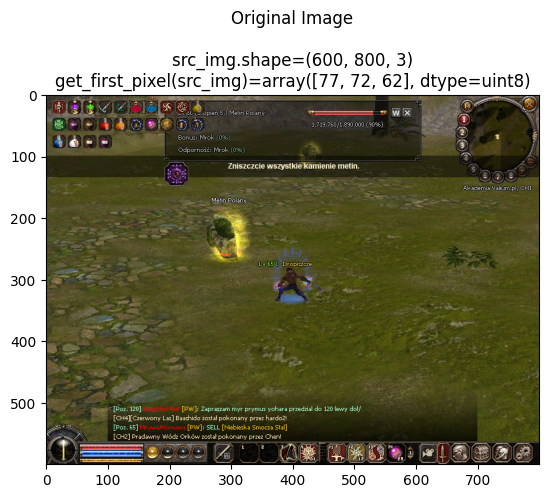

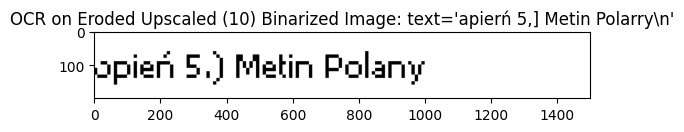

text='apierń 5,] Metin Polarry\n'


False

In [17]:
# target_menu_fpath = r"D:\Gry\ValiumAkademia\screenshot\0225_165406.jpg"
target_menu_fpath = r"D:\Gry\ValiumAkademia\screenshot\0225_171123.jpg"

target_name_bbox = (255, 20, 150, 20)

src_img = cv2.imread(target_menu_fpath, cv2.IMREAD_COLOR)
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

plt.title(f"Original Image\n\n{src_img.shape=}\n{get_first_pixel(src_img)=}")
plt.imshow(src_img)
plt.show()


target_menu_cropped = VisionDetector.crop_bbox(src_img, *target_name_bbox)

min_grayscale_threshold = 80
upscale = 10
oem = 1
psm = 7  # implies that we are treating the ROI as a single line of text
ocr_config = f'-l pol --psm {psm} --oem {oem}'

cropped_msg_img_grayscale = cv2.cvtColor(target_menu_cropped, cv2.COLOR_BGR2GRAY)
upscaled_img = scale_img(cropped_msg_img_grayscale, scale=upscale)

_, upscaled_binarized_img = cv2.threshold(upscaled_img, min_grayscale_threshold, 255, cv2.THRESH_BINARY)
upscaled_binarized_img = cv2.bitwise_not(upscaled_binarized_img)  # swap 0 - 255 to match the text color

text = pytesseract.image_to_string(upscaled_binarized_img, config=ocr_config)
plt.title(f"OCR on Eroded Upscaled ({upscale}) Binarized Image: {text=}")
plt.imshow(upscaled_binarized_img, cmap='gray')
plt.show()

print(f"{text=}")

"metin polany" in text.lower()